# 02-Statistical Link Between Variables

In [2]:
# Dependencies

# Standard Dependencies
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from statistics import median
from scipy import signal
from math import factorial
import scipy.stats as stats
from scipy.stats import sem, binom, lognorm, poisson, bernoulli, spearmanr
from scipy.fftpack import fft, fftshift

# Scikit-learn for Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Seed for reproducability
seed = 12345
np.random.seed(seed)


# Read in csv of Toy Dataset
# We will use this dataset throughout the tutorial
df = pd.read_csv('../data/toy_dataset.csv')

## Table of contents

- [Covariance](#7)
- [Correlation](#8)
- [Linear Regression](#9)
- [Bias, MSE and SE](#5)

## Covariance <a id="7"></a>

Covariance is a measure of how much two random variables vary together. variance is similar to covariance in that variance shows you how much one variable varies. Covariance tells you how two variables vary together.

If two variables are independent, their covariance is 0. However, a covariance of 0 does not imply that the variables are independent.

In [22]:
# Covariance between Age and Income
print('Covariance between Age and Income: ')

df[['Age', 'Income']].cov()

Covariance between Age and Income: 


,Age,Income
Age,133.922426,-3.811863e+02
Income,-381.186341,6.244752e+08


## Correlation <a id="8"></a>

Correlation is a standardized version of covariance. Here it becomes more clear that Age and Income do not have a strong correlation in our dataset.

The formula for Pearson's correlation coefficient consists of the covariance between the two random variables divided by the standard deviation of the first random variable times the standard deviation of the second random variable.

Formula for Pearson's correlation coefficient:

![](http://sherrytowers.com/wp-content/uploads/2013/09/correlation_xy-300x97.jpg)

In [23]:
# Correlation between two normal distributions
# Using Pearson's correlation
print('Pearson: ')
df[['Age', 'Income']].corr(method='pearson')

Pearson: 


,Age,Income
Age,1.000000,-0.001318
Income,-0.001318,1.000000


Another method for calculating a correlation coefficient is 'Spearman's Rho'. The formula looks different but it will give similar results as Pearson's method. In this example we see almost no difference, but this is partly because it is obvious that the Age and Income columns in our dataset have no correlation.

Formula for Spearmans Rho:

![](http://s3.amazonaws.com/hm_120408/fa/3d86/yhf5/9dwq/4m6e2kcav/original.jpg?1447778688)

In [24]:
# Using Spearman's rho correlation
print('Spearman: ')
df[['Age', 'Income']].corr(method='spearman')

Spearman: 


,Age,Income
Age,1.000000,-0.001452
Income,-0.001452,1.000000


/home/ubuntu/Documents/Projects/msci_data/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Well fitted but not well fitting: Linear regression plot on quadratic data'}>

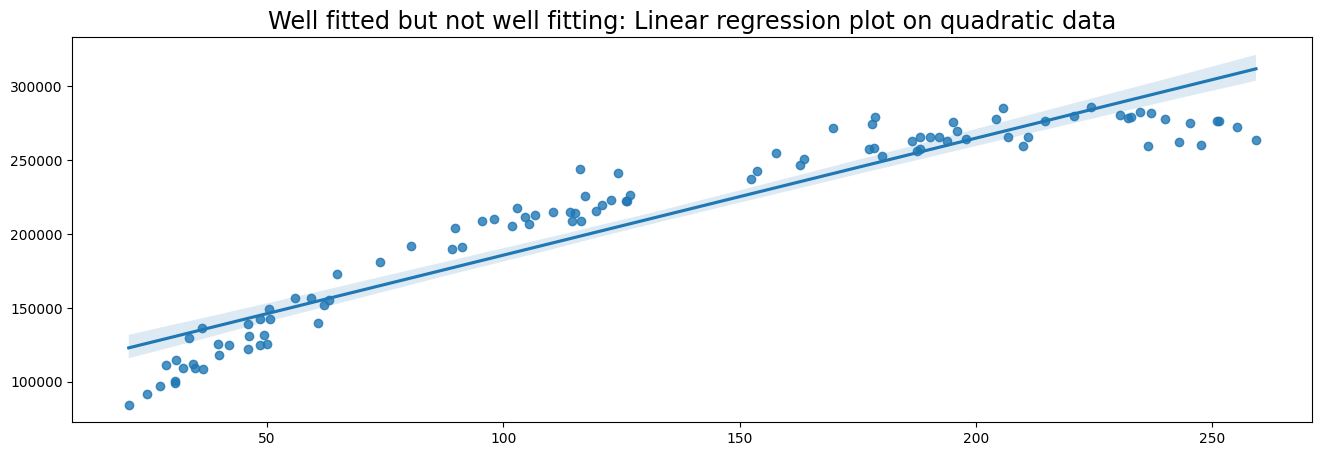

In [25]:
# Generate data
x = np.random.uniform(low=20, high=260, size=100)
y = 50000 + 2000*x - 4.5 * x**2 + np.random.normal(size=100, loc=0, scale=10000)

# Plot data with Linear Regression
plt.figure(figsize=(16,5))
plt.title('Well fitted but not well fitting: Linear regression plot on quadratic data', fontsize='xx-large')
sns.regplot(x, y)

## Linear regression <a id="9"></a>

Linear Regression can be performed through Ordinary Least Squares (OLS) or Maximum Likelihood Estimation (MLE).

Most Python libraries use OLS to fit linear models.

![](https://image.slidesharecdn.com/simplelinearregressionpelatihan-090829234643-phpapp02/95/simple-linier-regression-9-728.jpg?cb=1251589640)

## Bias, MSE and SE <a id="5"></a>

**Bias** is a measure of how far the sample mean deviates from the population mean. The sample mean is also called **Expected value**.

Formula for Bias:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/82a9c6501a54260ed0edd2f03923719b9f2db906)

The formula for expected value (EV) makes it apparent that the bias can also be formulated as the expected value minus the population mean:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/12828b1f927b39d2fa9d75f82c02b91209182911)

In [5]:
# Generate Normal Distribution
normal_dist = np.random.randn(10000)
normal_df = pd.DataFrame({'value' : normal_dist})
# Take sample
normal_df_sample = normal_df.sample(100)

# Calculate Expected Value (EV), population mean and bias
ev = normal_df_sample.mean()[0]
pop_mean = normal_df.mean()[0]
bias = ev - pop_mean

In [6]:
print('Sample mean (Expected Value): ', ev)
print('Population mean: ', pop_mean)
print('Bias: ', bias)

Sample mean (Expected Value):  -0.11906267796745086
Population mean:  -0.01073582444747704
Bias:  -0.10832685351997381


**MSE (Mean Squared Error)** is a formula to measure how much estimators deviate from the true distribution. This can be very useful with for example, evaluating regression models.


![](https://i.stack.imgur.com/iSWyZ.png)


**RMSE (Root Mean Squared Error)** is just the root of the MSE.


![](http://file.scirp.org/Html/htmlimages/5-2601289x/fcdba7fc-a40e-4019-9e95-aca3dc2db149.png)



In [7]:
from math import sqrt

Y = 100 # Actual Value
YH = 94 # Predicted Value

# MSE Formula 
def MSE(Y, YH):
     return np.square(YH - Y).mean()

# RMSE formula
def RMSE(Y, YH):
    return sqrt(np.square(YH - Y).mean())


print('MSE: ', MSE(Y, YH))
print('RMSE: ', RMSE(Y, YH))

MSE:  36.0
RMSE:  6.0


The **Standard Error (SE)** measures how spread the distribution is from the sample mean.

![](http://desktopia.net/p/2018/07/standard-deviation-biology-for-life-in-standard-error-of-the-mean-formula.gif)

The formula can also be defined as the standard deviation divided by the square root of the number of samples.

![](https://toptipbio.com/wp-content/uploads/2017/07/Standard-error-formula.jpg)

In [17]:
# Generate Normal Distribution
normal_dist = np.random.randn(10000)
normal_df = pd.DataFrame({'value' : normal_dist})
normal_dist = pd.Series(normal_dist)
# Create a Pandas Series for easy sample function
normal_dist = pd.Series(normal_dist)

normal_dist2 = np.random.randn(10000)
normal_df2 = pd.DataFrame({'value' : normal_dist2})
# Create a Pandas Series for easy sample function
normal_dist2 = pd.Series(normal_dist)

normal_df_total = pd.DataFrame({'value1' : normal_dist, 
                                'value2' : normal_dist2})

In [18]:
# Standard Error (SE)
# Uniform distribution (between 0 and 1)
uniform_dist = np.random.random(1000)
uniform_df = pd.DataFrame({'value' : uniform_dist})
uniform_dist = pd.Series(uniform_dist)

uni_sample = uniform_dist.sample(100)
norm_sample = normal_dist.sample(100)

print('Standard Error of uniform sample: ', sem(uni_sample))
print('Standard Error of normal sample: ', sem(norm_sample))

# The random samples from the normal distribution should have a higher standard error

Standard Error of uniform sample:  0.029383241532640426
Standard Error of normal sample:  0.09801666115089963
